In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

### 1.Загрузите датасет Olivetti faces;

In [18]:

faces = fetch_olivetti_faces()

### 3.Выведите информацию о количественных параметрах датасета;

In [3]:
print(faces.images.shape)

(400, 64, 64)


In [4]:
print(len(faces.target), faces.data[0].shape)

400 (4096,)


In [5]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

### 4.Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib;


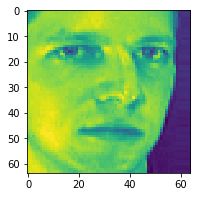

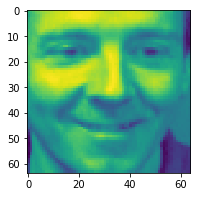

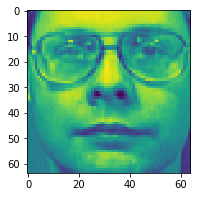

In [6]:
plt.figure(figsize=(3, 3))
plt.imshow(faces.data[1].reshape(64, 64))

plt.figure(figsize=(3, 3))
plt.imshow(faces.data[20].reshape(64, 64))

plt.figure(figsize=(3, 3))
plt.imshow(faces.data[30].reshape(64, 64))

### 5.Разделите эти данные на тестовую и обучающую выборки;

In [7]:
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, 
test_size=0.2,
random_state=True)

In [8]:
x_train.shape,y_train.shape

((320, 4096), (320,))

In [9]:
x_test.shape, y_test.shape

((80, 4096), (80,))

### Постройте модель классификатора метода опорных векторов для идентификации человека по изображению;


In [38]:
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [39]:
model1 = svm.SVC(kernel='rbf', C=1.0)
model1.fit(x_train, y_train)
y_predict = model1.predict(x_test)


Text(0.5, 15.0, 'Предсказанные значения')

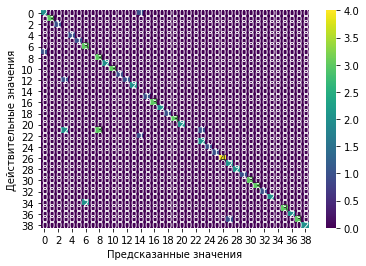

In [40]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_predict)),cmap="viridis",
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')



Очевидно, что тут глаза сломаешь, чем что-то поймешь
Но если смотреть по цветам то, ошибка классификации очень мала, так как почти все остальные ячейки, кроме главной диагонали по цвету равняются 0 

### 7.Оцените качество модели на тестовой выборке с помощью следующих метрик

In [13]:
acc = [0,0,0,0,0,0]

Поэтому лучше оценивать качество модели  с помощью числовых метрик

In [14]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.60      1.00      0.75         3
           7       0.00      0.00      0.00         1
           8       0.50      1.00      0.67         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         0
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
          18       1.00    

/Users/klmnskaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/klmnskaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
acc[0] = metrics.accuracy_score(y_test, y_predict)
print(acc[0])

0.8375


### 8.Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.


Я взяла функцию, предложенную skikit для графиеского изображения обучения

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt





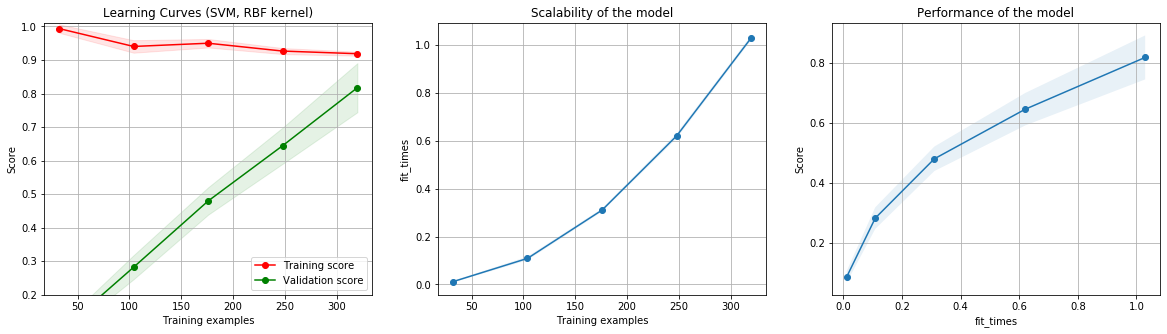

In [17]:

title = r"Learning Curves (SVM, RBF kernel)"
estimator = SVC(gamma = 'auto')
plot_learning_curve(estimator, title, faces.data, faces.target, ylim=(0.2, 1.01),
                    cv=None, n_jobs=2)

plt.show()

Если смотреть первыфй график в самом начале, то кривые слишком далеко друг от друга находятся, что говорит о переобучении

На этом же графике прямые валидации и тренировки в конце сходятся, при этом score тренировочной модели понижается, а для валидационных данных увеличивается, что говорит о недообученности модели, поэтому можно изменять параметры модели для более точных результатов

#### 9.Сделайте вывод о применимости модели.

Модель применима, так как показывает неплохой показатель accuracy, но она не доведена до конца, так как кривые обучения сходятся, из-за чего можно сделать вывод, что модель можно усложнять

### Дополнительные задания

#### 1.Постройте модели классификации на основе следующих методов

#### 3.Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.


логистическая регрессия (LogisticRegression);


( большая цифра для количества итераций, так как иначе при дефолтовых параметрах не достигается потимального решения при вызове fit)

In [18]:
from sklearn import preprocessing
lr = LogisticRegression(max_iter=4000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [19]:
print(classification_report(y_test, y_pred,zero_division='warn'))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00    

/Users/klmnskaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/klmnskaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
acc[1] = metrics.accuracy_score(y_test, y_pred)
print(acc[1])

0.975


метод опорных векторов с гауссовым ядром (SVC);



In [21]:
l_svc = svm.SVC(kernel='linear', C=1.0, probability=True)
l_svc.fit(x_train, y_train)
y_pred = l_svc.predict(x_test)

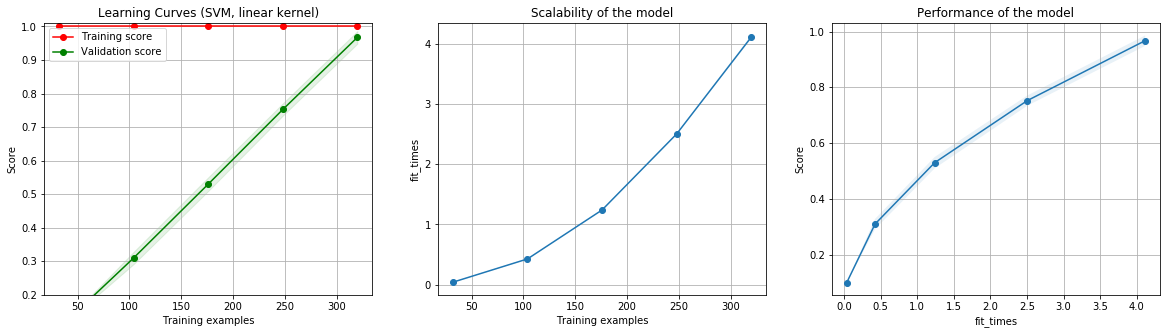

In [22]:
title = r"Learning Curves (SVM, linear kernel)"
estimator = l_svc
plot_learning_curve(estimator, title, faces.data, faces.target, ylim=(0.2, 1.01),
                    cv=None, n_jobs=2)

plt.show()

Для тренировчного дасета score 100% при любом объема выборке, а для тестового он повышается при увеличении объема выборки, это говорит о том, что модель скорее и не переобучена и не недообучена

In [23]:
print(classification_report(y_test, y_pred,zero_division='warn'))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.75      1.00      0.86         3
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00    

/Users/klmnskaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/klmnskaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
acc[2] = metrics.accuracy_score(y_test, y_pred)
print(acc[2])

0.9625


метод опорных векторов с полиномиальным ядром (SVC);


***(строила в основном задании)***

метод k ближайших соседей (KNeighborsClassifier);




In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric_params=None, n_neighbors=5, p=2, weights='uniform')
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)

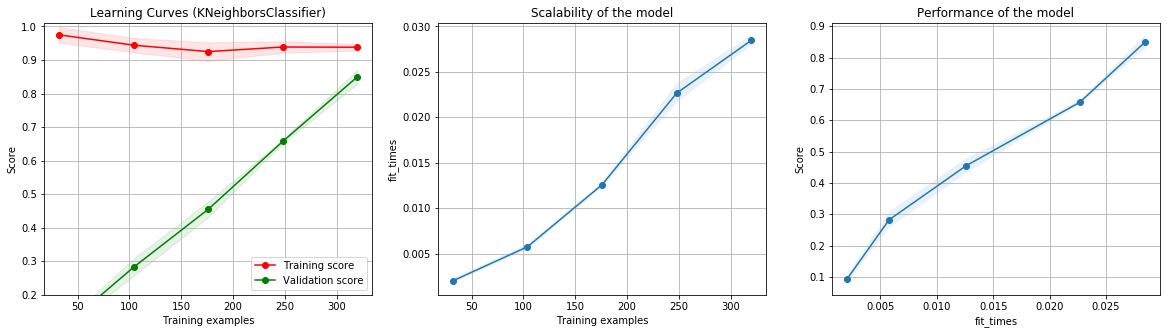

In [26]:
title = r"Learning Curves (KNeighborsClassifier)"
estimator = knn
plot_learning_curve(estimator, title, faces.data, faces.target, ylim=(0.2, 1.01),
                    cv=None, n_jobs=2)

plt.show()

Так как при увеличении объема выборки уменьшается точность классификации для теренировочной выборки и увеличивается для тестовой, можно говорить о недообученности модели, вследствие чего модель можно сделать точнее при помощи подборов параметра данной модели

In [27]:
print(classification_report(y_test, y_predict,zero_division=1))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      1.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.50      0.33      0.40         3
           7       1.00      0.00      0.00         1
           8       0.75      1.00      0.86         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         2
          14       0.00      1.00      0.00         0
          16       1.00      1.00      1.00         1
          17       0.43      1.00      0.60         3
          18       1.00    

In [28]:
acc[3] = metrics.accuracy_score(y_test, y_predict)
print(acc[3])

0.8125


многослойный перцептрон (MLP);



In [29]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=1000).fit(x_train, y_train)
y_predict = clf.predict(x_test)

In [30]:
print(classification_report(y_test, y_predict,zero_division=1))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      1.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.67      0.67      0.67         3
           7       1.00      0.00      0.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      0.00      0.00         1
          12       1.00      0.00      0.00         2
          13       1.00      1.00      1.00         2
          14       0.00      1.00      0.00         0
          15       0.00      1.00      0.00         0
          16       1.00      1.00      1.00         1
          17       0.75    

In [31]:
acc[4] = metrics.accuracy_score(y_test, y_predict)
print(acc[4])

0.875


#### 2.Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;

In [32]:
print('SVC с Гауссовым ядром:    ',acc[0])
print('LogisticRegression recall:',acc[1])
print('SVC linear:               ',acc[2])
print('KNeighborsClassifier:     ',acc[3])
print('MLP:                      ',acc[4])

SVC с Гауссовым ядром:     0.8375
LogisticRegression recall: 0.975
SVC linear:                0.9625
KNeighborsClassifier:      0.8125
MLP:                       0.875


#### 4.Сделайте замеры времени обучения для каждой модели. Сделайте вывод о сравнительной производительности моделей.


##### время для метода опорных векторов с гаусовым ядром

In [33]:
%timeit model1.fit(x_train,y_train)

1 s ± 8.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### время для метода KNeighborsClassifier

In [35]:
%timeit knn.fit(x_train,y_train)

27 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


для остальных методов время замера слишком долго, но при этом точность оставшихся методов более точная, что говорит о том, что более эффективные алгоритмы для этого датасета занимают больше времени для обучения

Поэтому оптимальный алгоритм нужно выбирать исходя из поставленной задачи:
так как всегда преследуют максимальную точность, то нужно использовать метод SVC c гауссовым ядром, так как у него достигается максимальная точность, при этом стоит брать во внимание то, что эта модель обучается долго ( а для большего объема данных оно займет еще больше времени)

#### 5.(*) Используйте сверточную нейронную сеть для решения той же задачи. Сравните ее эффективность и производительность с классическими моделями.


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical
import keras
from keras.backend import clear_session

In [38]:
train_X, test_X, train_y, test_y = train_test_split(
    faces.data.reshape(-1, 64, 64, 1),
    to_categorical(faces.target),
    stratify=to_categorical(faces.target),
    random_state=seed, shuffle=True, test_size=0.2
)

In [42]:
def create_model():
  clear_session()
  
  model = keras.Sequential()
  model.add(
      keras.layers.Conv2D(4, (4, 4), padding='valid', input_shape=(64, 64, 1))
  )
  model.add(keras.layers.MaxPool2D((3, 3), padding='valid'))
  model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.Dropout(0.2))
  model.add(
      keras.layers.Conv2D(8, (3, 3), padding='valid')
  )
  model.add(keras.layers.MaxPool2D((2, 2), padding='valid'))
  model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(len(pd.unique(faces.target)), activation='softmax'))
  
  model.compile(
      loss='categorical_crossentropy',
      metrics=['categorical_accuracy'],
      optimizer='adam'
  )
  
  return model

In [43]:
model = create_model()
model.fit(
    train_X, train_y,
    epochs=200,
    batch_size=10,
    verbose=1,
    validation_data=(
        test_X, test_y
    )
)

Epoch 1/200
32/32 [==============================] - 0s 12ms/step - loss: 3.7302 - categorical_accuracy: 0.0063 - val_loss: 3.6872 - val_categorical_accuracy: 0.0375
Epoch 2/200
32/32 [==============================] - 0s 7ms/step - loss: 3.6858 - categorical_accuracy: 0.0250 - val_loss: 3.6825 - val_categorical_accuracy: 0.0750
Epoch 3/200
32/32 [==============================] - 0s 7ms/step - loss: 3.6846 - categorical_accuracy: 0.0219 - val_loss: 3.6757 - val_categorical_accuracy: 0.1250
Epoch 4/200
32/32 [==============================] - 0s 7ms/step - loss: 3.6689 - categorical_accuracy: 0.0719 - val_loss: 3.6587 - val_categorical_accuracy: 0.1375
Epoch 5/200
32/32 [==============================] - 0s 7ms/step - loss: 3.6486 - categorical_accuracy: 0.0844 - val_loss: 3.6289 - val_categorical_accuracy: 0.1375
Epoch 6/200
32/32 [==============================] - 0s 7ms/step - loss: 3.6028 - categorical_accuracy: 0.1031 - val_loss: 3.5641 - val_categorical_accuracy: 0.1750
Epoch 7/2

Для каждой итерации требуется 7 милисекунд, всего 200 итераций

In [44]:
print(classification_report(np.argmax(test_y, axis=1), np.argmax(model.predict(test_X), axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

Оценивая эффективность данного метода, приходим к выводу, что он очень точен, к тому же если оценивать лог-потерю, то она тоже минимальна

А так как данный метод и быстрый, и хорош в метриках, то этот метод оптимальнее предыдущих